In [1]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from PIL import Image
import matplotlib.pyplot as plt


In [2]:
path = []   # Dosya yollarını tutacak liste
label = []  # Etiketleri tutacak liste

for dir_name, _, filenames in os.walk('/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'):
    for filename in filenames:
        if os.path.splitext(filename)[-1] == '.png':  
            if dir_name.split()[-1] != 'GT': 
                label.append(os.path.split(dir_name)[-1])  
                path.append(os.path.join(dir_name, filename))  

# DataFrame oluşturma
data = pd.DataFrame(columns=['path', 'label'])
data['path'] = path
data['label'] = label

# DataFrame'i görüntüleme
print(data.head())

                                                path            label
0  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
1  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
2  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
3  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
4  /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel


Veri setini %80 eğitim ve %20 test olarak ayırdım. Bu sayede modeli eğittikten sonra performansını test verisi üzerinde değerlendirebileceğim. Modeli 10 epoch boyunca eğittim. Eğitim sırasında, doğruluk (accuracy) ve kayıp (loss) metriklerini izleyerek modelin performansını gözlemledim.
Aşağıda eğitim ve doğrulama verileri için doğruluk ve kayıp grafikleri gösterilmiştir.

In [3]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Görüntüleri okuma ve boyutlandırma
img_size = (128, 128)
batch_size = 32

# Eğitim ve doğrulama için %20 doğrulama verisi aldım
train_datagen = ImageDataGenerator(
    rescale=1./255, 
    validation_split=0.2  # Doğrulama verisi oranı
)

# Eğitim veri seti
train_generator = train_datagen.flow_from_dataframe(
    data, 
    x_col='path', 
    y_col='label',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'  # Eğitim için ayırma
)

# Doğrulama veri seti
validation_generator = train_datagen.flow_from_dataframe(
    data, 
    x_col='path', 
    y_col='label',
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'  
)



# Modeli oluşturma
model = Sequential([
    Flatten(input_shape=(128, 128, 3)),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(len(data['label'].unique()), activation='softmax')  
])

# Modeli derleme
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Modelin özetini gösterme
model.summary()

# Modeli eğitme
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
    

)

Found 7200 validated image filenames belonging to 9 classes.
Found 1800 validated image filenames belonging to 9 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 49152)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     6,291,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 9)              │           585 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,300,425 (24.03 MB)

 Trainable params: 6,300,425 (24.03 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


225/225 ━━━━━━━━━━━━━━━━━━━━ 157s 673ms/step - accuracy: 0.1309 - loss: 3.7737 - val_accuracy: 0.0000e+00 - val_loss: 2.5428
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 98s 425ms/step - accuracy: 0.1285 - loss: 2.1641 - val_accuracy: 0.0000e+00 - val_loss: 2.9513
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 97s 423ms/step - accuracy: 0.1484 - loss: 2.0765 - val_accuracy: 0.0000e+00 - val_loss: 3.3472
Epoch 4/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 98s 424ms/step - accuracy: 0.1410 - loss: 2.0559 - val_accuracy: 0.0000e+00 - val_loss: 3.6746
Epoch 5/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 97s 421ms/step - accuracy: 0.1343 - loss: 2.0521 - val_accuracy: 0.0000e+00 - val_loss: 3.9483
Epoch 6/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 97s 423ms/step - accuracy: 0.1324 - loss: 2.0423 - val_accuracy: 0.0000e+00 - val_loss: 4.1779
Epoch 7/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 97s 422ms/step - accuracy: 0.1312 - loss: 2.0387 - val_accuracy: 0.0000e+00 - val_loss: 4.3462
Epoch 8/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 97s 419ms/step - accuracy

Resimler üzerinde işlem yapabilmek ve model eğitimi sırasında verileri batchler halinde işleyebilmek için ImageDataGenerator kullandım. Eğitim ve test verilerini uygun formatta ve boyutta modele vermek için bu generator'ları oluşturdum.Modeli test veri seti üzerinde  Doğruluk, confusion matrix ve classification report ile modelin performansını analiz ettim.


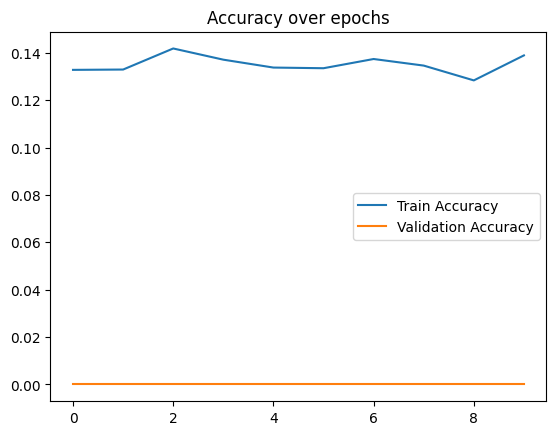

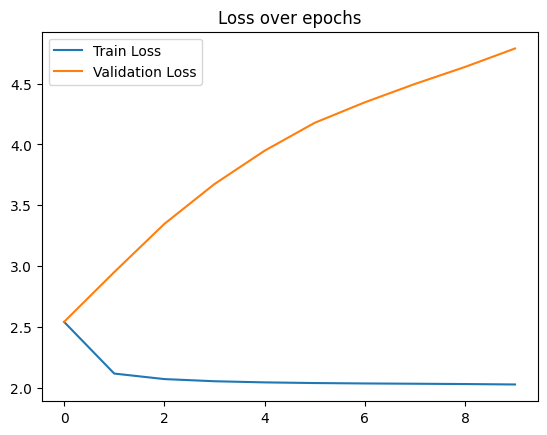

57/57 ━━━━━━━━━━━━━━━━━━━━ 18s 322ms/step


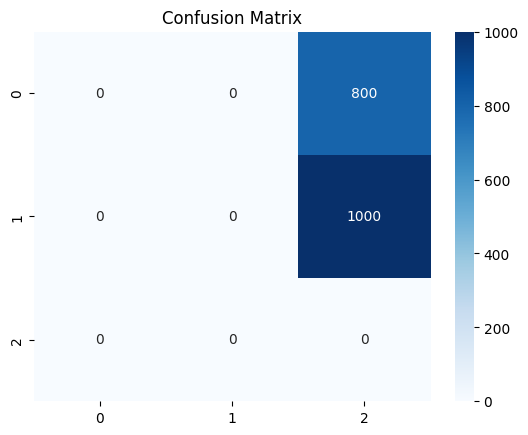

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.00      0.00     800.0
           2       1.00      0.00      0.00    1000.0
           8       0.00      1.00      0.00       0.0

    accuracy                           0.00    1800.0
   macro avg       0.67      0.33      0.00    1800.0
weighted avg       1.00      0.00      0.00    1800.0



In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

# Eğitim ve doğrulama doğruluk grafikleri
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy over epochs')
plt.show()

# Eğitim ve doğrulama kayıp grafikleri
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss over epochs')
plt.show()

# Test verisi üzerinde tahmin yapma
test_labels = validation_generator.classes
predictions = model.predict(validation_generator)
predicted_labels = np.argmax(predictions, axis=1)

# Confusion Matrix (Karışıklık Matrisi)
cm = confusion_matrix(test_labels, predicted_labels)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Classification Report (Sınıflandırma Raporu)
report = classification_report(test_labels, predicted_labels, zero_division=1)
print("Classification Report:\n", report)



Model performansını iyileştirmek için çeşitli hiperparametreler üzerinde optimizasyon çalışmaları yürüttüm. Bu parametreler:
Gizli katmanlardaki nöron sayısı
Dropout oranları
Optimizer türü
Bu parametrelerle oynayarak en iyi modeli elde etmeye çalıştım.

In [ ]:
from keras_tuner import RandomSearch
from keras.models import Sequential
from keras.layers import Flatten, Dense, Dropout, Input

# Veri setindeki sınıf sayısını belirleme
num_classes = len(data['label'].unique())

# Modeli tanımlama
def build_model(hp):
    model = Sequential([
        Input(shape=(128, 128, 3)),  # İlk katman olarak Input ekledim
        Flatten(),
        Dense(hp.Int('units_1', min_value=32, max_value=512, step=32), activation='relu'),
        Dropout(hp.Float('dropout_1', 0.2, 0.5)),
        Dense(hp.Int('units_2', min_value=32, max_value=512, step=32), activation='relu'),
        Dropout(hp.Float('dropout_2', 0.2, 0.5)),
        Dense(num_classes, activation='softmax')
    ])

    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# RandomSearch kullanarak en iyi hiperparametreleri bulma
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=20,  # Daha fazla deneme
    executions_per_trial=3
)

tuner.search(train_generator, epochs=10, validation_data=validation_generator)


Trial 1 Complete [01h 03m 01s]
val_accuracy: 0.0

Best val_accuracy So Far: 0.0
Total elapsed time: 01h 03m 01s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
128               |416               |units_1
0.43977           |0.26499           |dropout_1
384               |512               |units_2
0.27266           |0.35081           |dropout_2

Epoch 1/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 102s 438ms/step - accuracy: 0.1397 - loss: 3.4683 - val_accuracy: 0.0000e+00 - val_loss: 3.5593
Epoch 2/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 99s 430ms/step - accuracy: 0.1392 - loss: 2.0339 - val_accuracy: 0.0000e+00 - val_loss: 4.6124
Epoch 3/10
225/225 ━━━━━━━━━━━━━━━━━━━━ 99s 430ms/step - accuracy: 0.1371 - loss: 2.0206 - val_accuracy: 0.0000e+00 - val_loss: 5.0919
Epoch 4/10
 84/225 ━━━━━━━━━━━━━━━━━━━━ 49s 354ms/step - accuracy: 0.1252 - loss: 2.0297